In [2]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram #   from qiskit.tools.visualization import plot_bloch_multivector #   

In [44]:
secretnumber='1010'

In [45]:
circuit=QuantumCircuit(len(secretnumber)+1,len(secretnumber))
#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno== '1':
        circuit.cx(ii, len(secretnumber))

#circuit.cx(5,6 )
#circuit.cx(3,6 )
#circuit.cx(0,6 )

circuit.barrier()
#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.barrier()
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

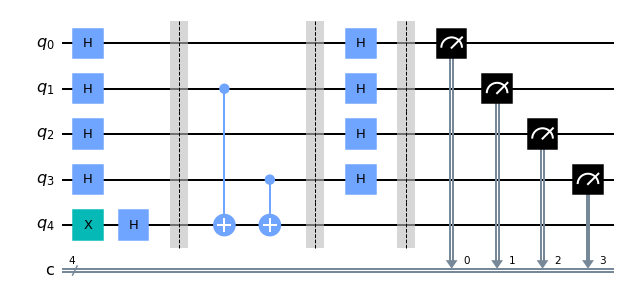

In [46]:
circuit.draw(output='mpl')

In [27]:
#Simulate the circut
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit,backend= simulator, shots=1).result()
counts= result.get_counts()
print(counts)

{'101001': 1}
